# Actividad 2: Análisis de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para fines de esta actividad se utilizarán 2 bases de datos, de nombre "Homicide.csv", y "Prision.xlsx", para cada una de ellas se plantearán una serie de preguntas con base a los temas y al contenido que pudiera tener la base de datos, y finalmente se buscará responder a una posible relación haciendo preguntas que tengan que ver con las dos bases de datos.

La base de datos "Homicide", contiene datos del número de homicidios por año, estan clasificados por pais, a la vez que por región y subregión. La base también tiene un indicador, en uno de ellos se nos indica la cantidad total de muertes y en el otro el 'rate' que es el número de muertos por cada 100000 habitantes.
La base de datos "Prision", contiene datos del número de personas encarceladas por año, estan clasificados de la misma manera que la base "Homicide", y de igual manera tenemos el número total de encarcelados y el rate.

## Preguntas homicide

1. ¿Cómo es la distribución del total de los homicidios por región?
2. ¿Cómo es la distribución del rate de los homicidios por región?
3. ¿Cómo ha ido cambiando el número de homicidios por año?
4. ¿Cuál es la región con mas homicidios?
5. De dicha región, ¿Cómo responden a los mismos cuestionamientos las subregiones?

In [2]:
h = pd.read_csv('/Users/guill/Desktop/AC/Bases de datos/Homicide.csv')
h

,Country,Region,Subregion,Indicator,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,Asia,Southern Asia,Homicide Total Count,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1115.0,983.0,1231.0,1948.0,NaN,NaN,3367.0,2289.0,2515.0
1,Afghanistan,Asia,Southern Asia,Homicide Rate,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,3.4,4.1,6.3,NaN,NaN,10.0,6.6,7.1
2,Albania,Europe,Southern Europe,Homicide Total Count,NaN,NaN,130.0,191.0,112.0,259.0,...,93.0,85.0,127.0,142.0,157.0,124.0,117.0,82.0,99.0,68.0
3,Albania,Europe,Southern Europe,Homicide Rate,NaN,NaN,4.0,6.0,3.6,8.3,...,3.1,2.9,4.3,4.9,5.4,4.2,4.0,2.8,3.4,2.3
4,Algeria,Africa,Northern Africa,Homicide Total Count,NaN,NaN,NaN,NaN,NaN,NaN,...,328.0,277.0,254.0,280.0,523.0,480.0,577.0,542.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Yemen,Asia,Western Asia,Homicide Rate,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,4.3,4.7,5.7,6.5,6.7,NaN,NaN,NaN,NaN
476,Zambia,Africa,Eastern Africa,Homicide Total Count,550.0,684.0,768.0,745.0,831.0,NaN,...,694.0,812.0,814.0,863.0,885.0,867.0,825.0,853.0,NaN,NaN
477,Zambia,Africa,Eastern Africa,Homicide Rate,6.9,8.3,9.1,8.6,9.3,NaN,...,5.3,6.0,5.9,6.0,6.0,5.7,5.3,5.3,NaN,NaN
478,Zimbabwe,Africa,Eastern Africa,Homicide Total Count,587.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,711.0,NaN,981.0,NaN,NaN,NaN,NaN,NaN


In [3]:
europa_total = np.zeros(1)
asia_total = np.zeros(1)
af_total = np.zeros(1)
am_total = np.zeros(1)
oc_total = np.zeros(1)
h = h.fillna(0)
for i in range(479):
    if h.iloc[i,1] == 'Europe' and h.iloc[i,3] == 'Homicide Total Count':
        if europa_total[0] == 0:
            europa_total = h.iloc[i,:]
        else:
            europa_total =  h.iloc[i,:] + europa_total
    
    if h.iloc[i,1] == 'Asia' and h.iloc[i,3] == 'Homicide Total Count':
        if asia_total[0] == 0:
            asia_total = h.iloc[i,:]
        else:
            asia_total =  h.iloc[i,:] + asia_total
    
    if h.iloc[i,1] == 'Africa' and h.iloc[i,3] == 'Homicide Total Count':
        if af_total[0] == 0:
            af_total = h.iloc[i,:]
        else:
            af_total =  h.iloc[i,:] + af_total
    
    if h.iloc[i,1] == 'Americas' and h.iloc[i,3] == 'Homicide Total Count':
        if am_total[0] == 0:
            am_total = h.iloc[i,:]
        else:
            am_total =  h.iloc[i,:] + am_total

    if h.iloc[i,1] == 'Oceania' and h.iloc[i,3] == 'Homicide Total Count':
        if oc_total[0] == 0:
            oc_total = h.iloc[i,:]
        else:
            oc_total =  h.iloc[i,:] + oc_total

europa_total = europa_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
asia_total = asia_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
af_total = af_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
am_total = am_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
oc_total = oc_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)

In [4]:
europa_r = np.zeros(1)
asia_r = np.zeros(1)
af_r = np.zeros(1)
am_r = np.zeros(1)
oc_r = np.zeros(1)

for i in range(479):
    if h.iloc[i,1] == 'Europe' and h.iloc[i,3] == 'Homicide Rate':
        if europa_r[0] == 0:
            europa_r = h.iloc[i,:]
        else:
            europa_r =  h.iloc[i,:] + europa_r
    
    if h.iloc[i,1] == 'Asia' and h.iloc[i,3] == 'Homicide Rate':
        if asia_r[0] == 0:
            asia_r = h.iloc[i,:]
        else:
            asia_r =  h.iloc[i,:] + asia_r
    
    if h.iloc[i,1] == 'Africa' and h.iloc[i,3] == 'Homicide Rate':
        if af_r[0] == 0:
            af_r = h.iloc[i,:]
        else:
            af_r =  h.iloc[i,:] + af_r
    
    if h.iloc[i,1] == 'Americas' and h.iloc[i,3] == 'Homicide Rate':
        if am_r[0] == 0:
            am_r = h.iloc[i,:]
        else:
            am_r =  h.iloc[i,:] + am_r

    if h.iloc[i,1] == 'Oceania' and h.iloc[i,3] == 'Homicide Rate':
        if oc_r[0] == 0:
            oc_r = h.iloc[i,:]
        else:
            oc_r =  h.iloc[i,:] + oc_r

europa_r = europa_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
asia_r = asia_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
af_r = af_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
am_r = am_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
oc_r = oc_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)

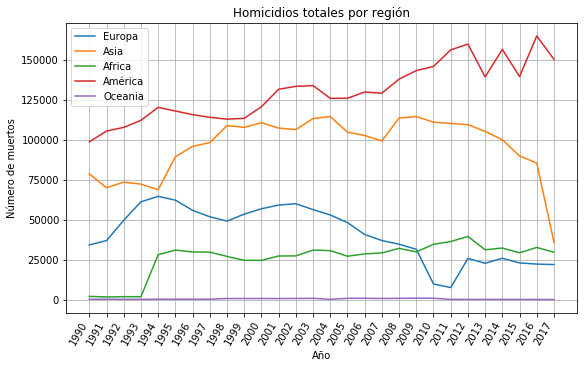

In [5]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.plot(europa_total, label='Europa')
plt.plot(asia_total, label='Asia')
plt.plot(af_total, label='Africa')
plt.plot(am_total, label = 'América')
plt.plot(oc_total, label = 'Oceania')

plt.xlabel('Año')
plt.ylabel('Número de muertos')
plt.title('Homicidios totales por región')
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.legend()
plt.grid()

plt.savefig('hom_t.jpg')
plt.show()

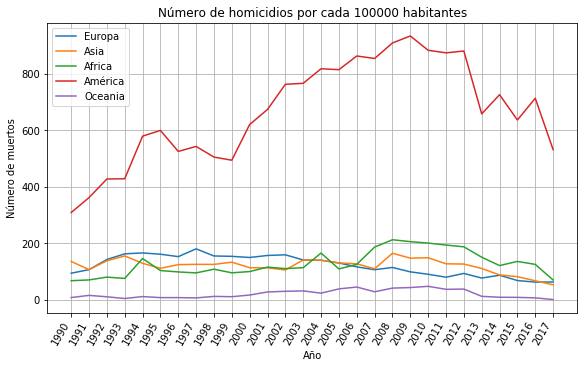

In [6]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.plot(europa_r, label='Europa')
plt.plot(asia_r, label='Asia')
plt.plot(af_r, label='Africa')
plt.plot(am_r, label = 'América')
plt.plot(oc_r, label = 'Oceania')

plt.xlabel('Año')
plt.ylabel('Número de muertos')
plt.title('Número de homicidios por cada 100000 habitantes')
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.legend()
plt.grid()
plt.savefig('hom_r.jpg')

plt.show()

In [20]:
car_total = np.zeros(1)
sa_total = np.zeros(1)
ca_total = np.zeros(1)
na_total = np.zeros(1)

h = h.fillna(0)
for i in range(479):
    if h.iloc[i,2] == 'Caribbean' and h.iloc[i,3] == 'Homicide Total Count':
        if car_total[0] == 0:
            car_total = h.iloc[i,:]
        else:
            car_total =  h.iloc[i,:] + car_total
    
    if h.iloc[i,2] == 'South America' and h.iloc[i,3] == 'Homicide Total Count':
        if sa_total[0] == 0:
            sa_total = h.iloc[i,:]
        else:
            sa_total =  h.iloc[i,:] + sa_total
    
    if h.iloc[i,2] == 'Central America' and h.iloc[i,3] == 'Homicide Total Count':
        if ca_total[0] == 0:
            ca_total = h.iloc[i,:]
        else:
            ca_total =  h.iloc[i,:] + ca_total
    
    if h.iloc[i,2] == 'Northern America' and h.iloc[i,3] == 'Homicide Total Count':
        if na_total[0] == 0:
            na_total = h.iloc[i,:]
        else:
            na_total =  h.iloc[i,:] + na_total


car_total = car_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
sa_total = sa_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
ca_total = ca_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
na_total = na_total.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)

car_r = np.zeros(1)
sa_r = np.zeros(1)
ca_r = np.zeros(1)
na_r = np.zeros(1)

auxc = 0
auxs = 0
aux = 0
auxn = 0

for i in range(479):
    if h.iloc[i,2] == 'Caribbean' and h.iloc[i,3] == 'Homicide Rate':
        if car_r[0] == 0:
            car_r = h.iloc[i,:]
        else:
            car_r =  h.iloc[i,:] + car_r
            auxc = auxc + 1
    
    if h.iloc[i,2] == 'South America' and h.iloc[i,3] == 'Homicide Rate':
        if sa_r[0] == 0:
            sa_r = h.iloc[i,:]
        else:
            sa_r =  h.iloc[i,:] + sa_r
            auxs = auxs + 1
    
    if h.iloc[i,2] == 'Central America' and h.iloc[i,3] == 'Homicide Rate':
        if ca_r[0] == 0:
            ca_r = h.iloc[i,:]
        else:
            ca_r =  h.iloc[i,:] + ca_r
            aux = aux + 1
    
    if h.iloc[i,2] == 'Northern America' and h.iloc[i,3] == 'Homicide Rate':
        if na_r[0] == 0:
            na_r = h.iloc[i,:]
        else:
            na_r =  h.iloc[i,:] + na_r
            auxn = auxn + 1


car_r = car_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
sa_r = sa_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
ca_r = ca_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)
na_r = na_r.drop(['Country', 'Region', 'Subregion', 'Indicator'], axis=0)

car_r = car_r/auxc
sa_r = sa_r/auxs
ca_r = ca_r/aux
na_r = na_r/auxn

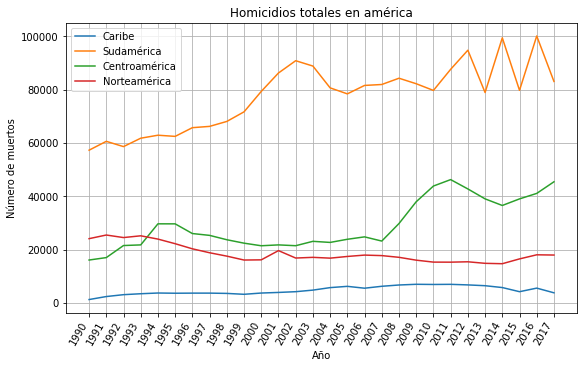

In [21]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.plot(car_total, label='Caribe')
plt.plot(sa_total, label='Sudamérica')
plt.plot(ca_total, label='Centroamérica')
plt.plot(na_total, label = 'Norteamérica')

plt.xlabel('Año')
plt.ylabel('Número de muertos')
plt.title('Homicidios totales en américa')
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.legend()
plt.grid()

plt.savefig('ha_t.jpg')
plt.show()

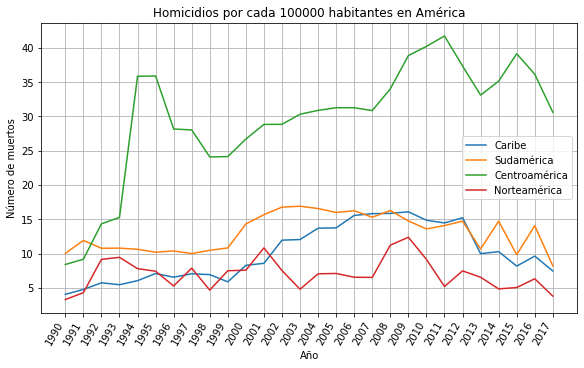

In [22]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.plot(car_r, label='Caribe')
plt.plot(sa_r, label='Sudamérica')
plt.plot(ca_r, label='Centroamérica')
plt.plot(na_r, label = 'Norteamérica')

plt.xlabel('Año')
plt.ylabel('Número de muertos')
plt.title('Homicidios por cada 100000 habitantes en América')
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.legend()
plt.grid()

plt.savefig('ha_r.jpg')
plt.show()

## Preguntas prision

1. ¿En que regiones hay un mayor número de prisioneros?
2. ¿Cuál es la distribución del rate de prisioneros por región?
3. Utilizando la misma región que en los homicidios, ¿como es la distribución de los prisioneros en dicha región?

In [14]:
p = pd.read_excel('/Users/guill/Desktop/AC/Bases de datos/Prision.xlsx')
p

,Region,Sub Region,Countries,Year,Count,Rate
0,Asia,Southern Asia,Afghanistan,2004,5262.0,21.816844
1,Asia,Southern Asia,Afghanistan,2006,7706.0,29.760422
2,Asia,Southern Asia,Afghanistan,2007,10590.0,39.786913
3,Asia,Southern Asia,Afghanistan,2008,12500.0,45.797559
4,Asia,Southern Asia,Afghanistan,2010,18283.0,63.475659
...,...,...,...,...,...,...
2309,Africa,Eastern Africa,Zimbabwe,2012,16900.0,114.881381
2310,Africa,Eastern Africa,Zimbabwe,2013,16902.0,112.272033
2311,Africa,Eastern Africa,Zimbabwe,2014,17484.0,113.446462
2312,Africa,Eastern Africa,Zimbabwe,2015,18857.0,119.518673


In [15]:
europa_count = 0
asia_count = 0
af_count = 0
am_count = 0
oc_count = 0
a = 0
b = 0
c = 0
d = 0
e = 0

for i in range(479):
    if p.iloc[i,0] == 'Europe':
        europa_count =  p.iloc[i,4] + europa_count
        a = e + 1
    
    if p.iloc[i,0] == 'Asia':
        asia_count =  p.iloc[i,4] + asia_count
        b = a + 1
        
    if p.iloc[i,0] == 'Africa':
        af_count =  p.iloc[i,4] + af_count
        c = c + 1
        
    if p.iloc[i,0] == 'Americas':
        am_count =  p.iloc[i,4] + am_count
        d = d + 1
        
    if p.iloc[i,0] == 'Oceania':
        oc_count =  p.iloc[i,4] + oc_count
        e = e + 1
        
europa_count = europa_count/a
asia_count = asia_count/b
af_count = af_count/c
am_count = am_count/d
oc_count = oc_count/e

In [16]:
europa_rate = 0
asia_rate = 0
af_rate = 0
am_rate = 0
oc_rate = 0
a = 0
b = 0
c = 0
d = 0
e = 0

for i in range(479):
    if p.iloc[i,0] == 'Europe':
        europa_rate =  p.iloc[i,5] + europa_rate
        a = e + 1
    
    if p.iloc[i,0] == 'Asia':
        asia_rate =  p.iloc[i,5] + asia_rate
        b = a + 1
        
    if p.iloc[i,0] == 'Africa':
        af_rate =  p.iloc[i,5] + af_rate
        c = c + 1
        
    if p.iloc[i,0] == 'Americas':
        am_rate =  p.iloc[i,5] + am_rate
        d = d + 1
        
    if p.iloc[i,0] == 'Oceania':
        oc_rate =  p.iloc[i,5] + oc_rate
        e = e + 1
        
europa_rate = europa_rate/a
asia_rate = asia_rate/b
af_rate = af_rate/c
am_rate = am_rate/d
oc_rate = oc_rate/e

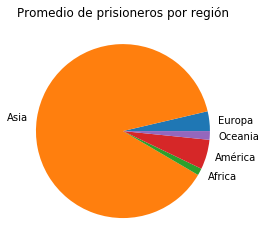

In [17]:
plt.pie([europa_count, asia_count, af_count, am_count, oc_count], labels = ['Europa', 'Asia', 'Africa', 'América', 'Oceania'])
plt.title('Promedio de prisioneros por región')

plt.savefig('p_t.jpg')
plt.show()

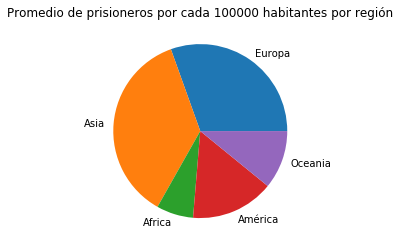

In [18]:
plt.pie([europa_rate, asia_rate, af_rate, am_rate, oc_rate], labels = ['Europa', 'Asia', 'Africa', 'América', 'Oceania'])
plt.title('Promedio de prisioneros por cada 100000 habitantes por región')

plt.savefig('p_r.jpg')
plt.show()

In [329]:
car_count = 0
sa_count = 0
ca_count = 0
na_count = 0

a = 0
b = 0
c = 0
d = 0


for i in range(479):
    if p.iloc[i,1] == 'Caribbean':
        car_count =  p.iloc[i,4] + car_count
        a = e + 1
    
    if p.iloc[i,1] == 'South America':
        sa_count =  p.iloc[i,4] + sa_count
        b = a + 1
        
    if p.iloc[i,1] == 'Central America':
        ca_count =  p.iloc[i,4] + ca_count
        c = c + 1
        
    if p.iloc[i,1] == 'Northern America':
        na_count=  p.iloc[i,4] + na_count
        d = d + 1
        
        
car_count = car_count/a
sa_count = sa_count/b
ca_count = ca_count/c
na_count = na_count/d

In [330]:
car_rate = 0
sa_rate = 0
ca_rate = 0
na_rate = 0

a = 0
b = 0
c = 0
d = 0


for i in range(479):
    if p.iloc[i,1] == 'Caribbean':
        car_rate =  p.iloc[i,5] + car_rate
        a = e + 1
    
    if p.iloc[i,1] == 'South America':
        sa_rate =  p.iloc[i,5] + sa_rate
        b = a + 1
        
    if p.iloc[i,1] == 'Central America':
        ca_rate =  p.iloc[i,5] + ca_rate
        c = c + 1
        
    if p.iloc[i,1] == 'Northern America':
        na_rate =  p.iloc[i,5] + na_rate
        d = d + 1
        
        
car_rate = car_rate/a
sa_rate = sa_rate/b
ca_rate = ca_rate/c
na_rate = na_rate/d

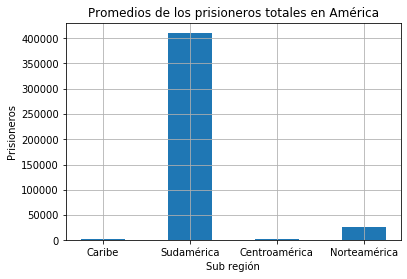

In [331]:
fig = plt.figure()
ax = fig.add_subplot(111)

nombres = ["Caribe",'Sudamérica','Centroamérica','Norteamérica']
datos = [car_count, sa_count, ca_count, na_count]
xx = range(len(datos))

ax.bar(xx, datos, width=0.5, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.xlabel('Sub región')
plt.ylabel('Prisioneros')
plt.title('Promedios de los prisioneros totales en América')
plt.grid()
plt.savefig('pa_t.jpg')
plt.show()

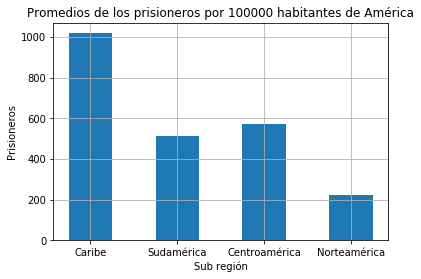

In [332]:
fig = plt.figure()
ax = fig.add_subplot(111)

nombres = ["Caribe",'Sudamérica','Centroamérica','Norteamérica']
datos = [car_rate, sa_rate, ca_rate, na_rate]
xx = range(len(datos))

ax.bar(xx, datos, width=0.5, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.xlabel('Sub región')
plt.ylabel('Prisioneros')
plt.title('Promedios de los prisioneros por 100000 habitantes de América')
plt.grid()
plt.savefig('pa_r.jpg')
plt.show()